In [27]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore as pos

In [28]:
# import uncleaned dataset
ejs = pd.read_csv("/Users/clairezegger/Downloads/Spring 2025/QTM 498R/coding/datasets/EJScreenData.csv")
ejs

/var/folders/01/jpt1czmx7tgbjnntxwf7l43r0000gn/T/ipykernel_55437/839283571.py:2: DtypeWarning: Columns (173,177,182,183,184,185,187,193,194,195,196,197,198,199,200,201,203,204,205,207,209,211,213,215,216,217,218,219,220,221) have mixed types. Specify dtype option on import or set low_memory=False.
  ejs = pd.read_csv("/Users/clairezegger/Downloads/Spring 2025/QTM 498R/coding/datasets/EJScreenData.csv")


,OID_,ID,STATE_NAME,ST_ABBREV,CNTY_NAME,REGION,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,...,T_D2_DWATER,T_D5_DWATER,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,EXCEED_COUNT_80,EXCEED_COUNT_80_SUP,Shape_Length,Shape_Area
0,1,1.001020e+09,ALABAMA,AL,Autauga County,4.0,1865.0,1865.0,1266.0,700.0,...,77 %ile,92 %ile,9825303.0,28435.0,0.0,0.0,0.0,1.0,0.153800,0.000945
1,2,1.001020e+09,ALABAMA,AL,Autauga County,4.0,1861.0,1669.0,1475.0,544.0,...,89 %ile,83 %ile,3320818.0,5669.0,0.0,0.0,1.0,1.0,0.092916,0.000319
2,3,1.001020e+09,ALABAMA,AL,Autauga County,4.0,3492.0,3486.0,2296.0,1305.0,...,81 %ile,82 %ile,5349271.0,9054.0,0.0,0.0,1.0,1.0,0.100499,0.000514
3,4,1.001020e+09,ALABAMA,AL,Autauga County,4.0,3987.0,3987.0,3077.0,1666.0,...,72 %ile,90 %ile,6384282.0,8408.0,0.0,0.0,1.0,3.0,0.117871,0.000613
4,5,1.001021e+09,ALABAMA,AL,Autauga County,4.0,4121.0,4121.0,2958.0,1783.0,...,67 %ile,75 %ile,6203654.0,0.0,0.0,0.0,1.0,1.0,0.109853,0.000595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86077,86078,7.801035e+09,Virgin Islands,VI,St. Croix Island,2.0,238.0,238.0,189.0,230.0,...,NaN,NaN,1486032.0,0.0,NaN,NaN,1.0,NaN,0.053795,0.000125
86078,86079,7.801008e+09,Virgin Islands,VI,St. Croix Island,2.0,68.0,68.0,53.0,65.0,...,NaN,NaN,1846643.0,0.0,NaN,NaN,3.0,NaN,0.065407,0.000157
86079,86080,7.803055e+09,Virgin Islands,VI,St. Thomas Island,2.0,1635.0,1326.0,947.0,1258.0,...,NaN,NaN,2990088.0,1354.0,NaN,1.0,4.0,NaN,0.092625,0.000252
86080,86081,7.802009e+09,Virgin Islands,VI,St. John Island,2.0,0.0,0.0,0.0,0.0,...,NaN,NaN,1118545.0,21699.0,NaN,NaN,0.0,NaN,0.050068,0.000096


In [29]:
# subset dataset to include GA entries only
ejs_GA = ejs[ejs['STATE_NAME'] == 'GEORGIA']
ejs_GA['STATE_NAME'].unique()

array(['GEORGIA'], dtype=object)

In [30]:
# subset columns to keep in dataset: variables related to income, location, and drinking water compliance
vars_to_keep = ["ID" , "CNTY_NAME", "REGION" , "ACSTOTPOP", "ACSIPOVBAS" , "LOWINCOME" , "LOWINCPCT" ,
                 "UNEMPLOYED", "LESSHSPCT" , "UNEMPPCT" , "P_LOWINCPCT" , "P_UNEMPPCT" , "P_LESSHSPCT", "PTSDF" , "DWATER" , "P_DWATER" , "LIFEEXPPCT"]

ejs_SES = ejs_GA[vars_to_keep]
ejs_SES

,ID,CNTY_NAME,REGION,ACSTOTPOP,ACSIPOVBAS,LOWINCOME,LOWINCPCT,UNEMPLOYED,LESSHSPCT,UNEMPPCT,P_LOWINCPCT,P_UNEMPPCT,P_LESSHSPCT,PTSDF,DWATER,P_DWATER,LIFEEXPPCT
21290,1.300195e+10,Appling County,4.0,3628.0,3613.0,1680.0,0.464988,32.0,0.200287,0.020215,77.0,22.0,82.0,0.000000,NaN,NaN,0.218462
21291,1.300195e+10,Appling County,4.0,2392.0,2392.0,1038.0,0.433946,44.0,0.252042,0.033639,72.0,38.0,91.0,0.000000,0.0,0.0,0.258462
21292,1.300195e+10,Appling County,4.0,2361.0,2160.0,1362.0,0.630556,49.0,0.222086,0.067867,93.0,70.0,87.0,0.000000,0.0,0.0,0.258462
21293,1.300195e+10,Appling County,4.0,2716.0,2592.0,1333.0,0.514275,37.0,0.162657,0.047014,83.0,53.0,73.0,0.000000,0.0,0.0,0.246154
21294,1.300195e+10,Appling County,4.0,1759.0,1759.0,1159.0,0.658897,52.0,0.288353,0.074820,94.0,75.0,95.0,0.000000,0.0,0.0,0.246154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24081,1.332195e+10,Worth County,4.0,2241.0,2067.0,848.0,0.410256,18.0,0.076728,0.018200,68.0,20.0,39.0,0.084647,0.0,0.0,0.220513
24082,1.332195e+10,Worth County,4.0,3994.0,3853.0,1757.0,0.456008,136.0,0.098799,0.075556,75.0,76.0,49.0,0.000000,0.0,0.0,0.220513
24083,1.332195e+10,Worth County,4.0,4800.0,4800.0,1835.0,0.382292,90.0,0.156558,0.044665,63.0,51.0,71.0,0.000000,0.0,0.0,0.197949
24084,1.332195e+10,Worth County,4.0,4293.0,4241.0,1684.0,0.397076,161.0,0.195026,0.076412,66.0,76.0,81.0,0.051414,0.0,0.0,0.261538


In [31]:
# rename variables
ejs_SES = ejs_SES.rename(columns={'CNTY_NAME': 'COUNTY' , 'ACSTOTPOP': 'TOTAL_POP' , 'ACSIPOVBAS': 'POP_KNOWN_POV_STATUS' , 
                                  'LOWINCPCT' : '%_LOW_INCOME' , 
                        'UNEMPPCT':'%_UNEMPLOYED' , 'P_LOWINCPCT' : 'LOW_INC_%ILE', 'P_UNEMPPCT': 'UNEMPLOYED_%ILE' , 
                          'P_LESSHSPCT' : '< HS EDU %ILE', 'PTSDF': 'HAZWASTE_DIST', 'DWATER': 'DWATER_NONCOMPLIANCE' , 'LIFEEXPPCT' : '%_LOWLIFE_EXPT' , 
                          'LESSHSPCT': '%_<HSED'})

# remove NA values
ejs_SES = ejs_SES.dropna()

In [32]:
# cleaning percent low income variable

# variable is in percent but is coded as a proportion- need to multiply by 100
ejs_SES["%_LOW_INCOME"].describe()
ejs_SES['%_LOW_INCOME'] = ejs_SES['%_LOW_INCOME']*100
ejs_SES["%_LOW_INCOME"].describe()


count    2369.000000
mean       33.235961
std        18.023306
min         0.000000
25%        18.945312
50%        31.767956
75%        45.247261
max        91.042584
Name: %_LOW_INCOME, dtype: float64

In [33]:
# group % low income based on county instead of census block

# total population in data set
w = sum(ejs_SES["TOTAL_POP"])

# create the "weight" variable
ejs_SES["pop_weight"] = ejs_SES["TOTAL_POP"] / w

weight = ejs_SES["pop_weight"]

# confirm that this adds to 1
sum(weight)

# create variable that holds weighted % low income by census block unit
ejs_SES["%_LOWINC_W"] = ejs_SES["%_LOW_INCOME"]*weight

# create variable that holds weighted drinking water compliance 
ejs_SES["DWATER_W"] = ejs_SES["DWATER_NONCOMPLIANCE"]*weight

# subset variables of interest
vars_to_keep2 = ["COUNTY", "DWATER_W", "%_LOWINC_W"]

ejs_final = ejs_SES[vars_to_keep2]

ejs_final

ejs_final = ejs_final.groupby(by=['COUNTY'], as_index=False).sum()
ejs_final

# weighted average of drinking water compliance score + % low income by county
ejs_final.describe()


,DWATER_W,%_LOWINC_W
count,159.000000,159.000000
mean,0.003454,0.200224
std,0.010635,0.346715
min,0.000000,0.008146
25%,0.000067,0.047086
50%,0.000587,0.084785
75%,0.002567,0.204562
max,0.108749,2.407407


In [34]:
# turn dwater compliance scores into percentiles by county

# sort data table in asc order by DWATER score
ejs_final = ejs_final.sort_values(by='DWATER_W')

# convert to series
series = pd.Series(ejs_final["DWATER_W"])

# convert values to percentile
ejs_final["PERCENTILE_DWATER"] = series.apply(lambda x: pos(ejs_final["DWATER_W"], x))

ejs_final


,COUNTY,DWATER_W,%_LOWINC_W,PERCENTILE_DWATER
0,Appling County,0.000000,0.078951,10.062893
36,Cook County,0.000000,0.084195,10.062893
40,Dade County,0.000000,0.053024,10.062893
45,Dooly County,0.000000,0.053215,10.062893
51,Elbert County,0.000000,0.083592,10.062893
...,...,...,...,...
46,Dougherty County,0.024775,0.436629,97.484277
24,Chatham County,0.029983,0.961292,98.113208
96,McDuffie County,0.038384,0.067083,98.742138
62,Glynn County,0.054506,0.306484,99.371069


In [35]:
# turn % low income variable into percentiles by county

# sort data table in asc order
ejs_final = ejs_final.sort_values(by='%_LOWINC_W')

# convert to series
series_li = pd.Series(ejs_final["%_LOWINC_W"])

# convert values to percentile
ejs_final["PERCENTILE_LOWINC"] = series_li.apply(lambda x: pos(ejs_final["%_LOWINC_W"], x))

ejs_final

,COUNTY,DWATER_W,%_LOWINC_W,PERCENTILE_DWATER,PERCENTILE_LOWINC
130,Taliaferro County,0.005073,0.008146,82.389937,0.628931
117,Quitman County,0.000183,0.009319,33.333333,1.257862
151,Webster County,0.000131,0.011730,29.559748,1.886792
61,Glascock County,0.013056,0.011745,96.226415,2.515723
25,Chattahoochee County,0.000000,0.012245,10.062893,3.144654
...,...,...,...,...,...
30,Clayton County,0.000501,1.237398,47.169811,97.484277
42,DeKalb County,0.000587,1.481648,50.314465,98.113208
32,Cobb County,0.000982,1.567022,60.377358,98.742138
66,Gwinnett County,0.000108,2.396877,27.672956,99.371069


In [36]:
ejs_final["PERCENTILE_DWATER"].describe()

ejs_final["PERCENTILE_LOWINC"].describe()

count    159.000000
mean      50.314465
std       28.958150
min        0.628931
25%       25.471698
50%       50.314465
75%       75.157233
max      100.000000
Name: PERCENTILE_LOWINC, dtype: float64

Text(0.5, 1.0, 'Comparing low income and drinking water noncompliance percentiles')

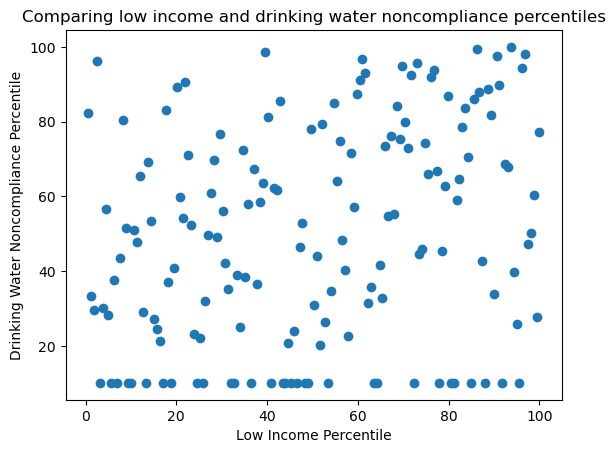

In [37]:
plt.scatter(x = ejs_final["PERCENTILE_LOWINC"],y = ejs_final["PERCENTILE_DWATER"])
plt.xlabel("Low Income Percentile")
plt.ylabel("Drinking Water Noncompliance Percentile")
plt.title("Comparing low income and drinking water noncompliance percentiles")

#does not appear to be a significant relationship

In [38]:
# rename variables
ejs_final = ejs_final.rename(columns={'DWATER_W': 'DRINK_WATER_NONCOMPL' , '%_LOWINC_W' : 'PERCENT_LOWINC' , 
'PERCENTILE_DWATER' : 'PERCENTILE_DRINKWATER_NONCOMPL'})
ejs_final

,COUNTY,DRINK_WATER_NONCOMPL,PERCENT_LOWINC,PERCENTILE_DRINKWATER_NONCOMPL,PERCENTILE_LOWINC
130,Taliaferro County,0.005073,0.008146,82.389937,0.628931
117,Quitman County,0.000183,0.009319,33.333333,1.257862
151,Webster County,0.000131,0.011730,29.559748,1.886792
61,Glascock County,0.013056,0.011745,96.226415,2.515723
25,Chattahoochee County,0.000000,0.012245,10.062893,3.144654
...,...,...,...,...,...
30,Clayton County,0.000501,1.237398,47.169811,97.484277
42,DeKalb County,0.000587,1.481648,50.314465,98.113208
32,Cobb County,0.000982,1.567022,60.377358,98.742138
66,Gwinnett County,0.000108,2.396877,27.672956,99.371069


In [39]:
#exporting cleaned set
ejs_final.to_csv('ejs_clean.csv', index=False, encoding='utf-8')